In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import re
import sys

sys.path.append(os.path.abspath("../../"))
from dataset import DS_NAMES
from dataset import DS_DIMENSIONS
from utilities.figure_tools import get_latest_results_directory, make_fig_directory, load_results

cmap = plt.get_cmap("Set1")
colors = cmap.colors

In [34]:
run_id, run_path = get_latest_results_directory("../../results/index-test/")
# run_id = 98
# run_path = "C:/Users/Peter/Documents/Peter/9-Graduate-School/2-dsrg/explainable-ad/code/HEEAD/results/compare-methods/run-{:003d}".format(run_id)
fig_output_path = make_fig_directory(run_id)
results = None
all_results = None
found_ds = None

In [35]:
def load_all_results(group_fields=["explainer", "rbv_num_interval"]):
    found_ds, results = load_results(run_path, group_fields=["explainer", "rbv_num_interval"])

    all_results = pd.DataFrame(columns=["dataset", "explainer", "n_samples", "n_samples_explained", "n_features", "accuracy", "precision", "recall", "f1", "avg_nnodes", "avg_nleaves", "avg_depth", "q", "jaccard", "coverage_ratio", "mean_distance", "mean_length", "runtime", "clique_size", "init_time", "sample_runtime", "mdr"])

    for ds in found_ds:
        results[ds]["sample_runtime"] = results[ds].runtime / results[ds].n_samples_explained * 1000
        results[ds]["init_time"] = results[ds]["init_time"] * 1000
        results[ds]["mdr"] = results[ds].mean_distance
        # results[ds]["mdr"] = results[ds].mean_distance / np.sqrt(results[ds].n_features)


    for ds in found_ds:
        for index, row in results[ds].iterrows():
            row["dataset"] = ds
            all_results = all_results.append(row)
    idx_neg = all_results["clique_size"] < 0
    all_results.loc[idx_neg, "clique_size"] = 0

    found_explainers = all_results["explainer"].unique()
    explainer_dict = {
        "AFT" : "AFT",
        "FACET" : "FACET",
        "FACETPaths" : "FACETPaths",
        "FACETTrees" : "FACETTrees",
        "FACETGrow" : "FACETGrow",
        "FACETIndex": "FACETIndex",
        "FACETBranchBound": "FACETBranchBound",
        "OCEAN" : "OCEAN",
        "MACE": "MACE"
    }
    explainer_colors = {
        "AFT" : colors[3] , # purple
        "FACET" : colors[0], # red
        "FACETPaths" : colors[0], # red
        "FACETTrees" : colors[0], # red
        "FACETGrow" : "orangered",
        "FACETIndex" : colors[0], # red
        "FACETBranchBound": "purple",
        "OCEAN" : colors[4], # orange
        "MACE": colors[1] # blue
    }
    explainer_names = []
    for e in found_explainers:
        explainer_names.append(explainer_dict[e])

    # print("Generating figures for run-{:03d}".format(run_id))
    # print("Datasets included:")
    # for ds in found_ds:
    #     print("\t", ds)
    # print("Explainers included:")
    # for expl in found_explainers:
    #     print("\t", expl)

In [36]:
all_results.head(6)

AttributeError: 'NoneType' object has no attribute 'head'

In [ ]:
def render_plot(xfeature, yfeature, xlabel, ylabel, title, save_name=None, xrange=None, yrange=None, xlog=False, lloc=None):
    plt.figure()

    for i in range(len(found_ds)):
        ds = found_ds[i]
        plt.plot(results[ds][xfeature], results[ds][yfeature], label=ds, lw=2.0)

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    # plt.xlim(xrange)
    # plt.ylim(yrange)
    plt.legend(loc=lloc)
    if save_name is not None:
        plt.savefig(fig_output_path + "/" + save_name, bbox_inches="tight")

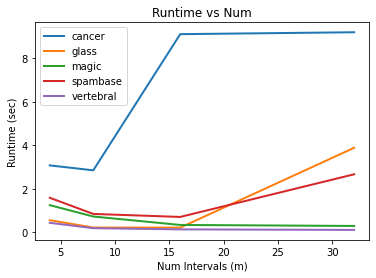

In [ ]:
found_ds, results = load_results(run_path, group_fields=["explainer", "rbv_num_interval"])
render_plot("rbv_num_interval", "runtime", xlabel="Num Intervals (m)", ylabel="Runtime (sec)", title="Runtime vs Num")

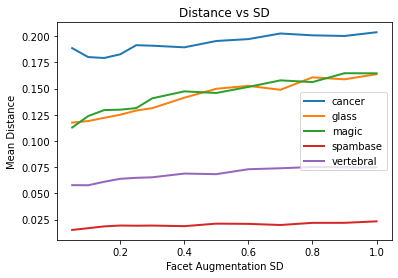

In [ ]:
found_ds, results = load_results(run_path, group_fields=["explainer", "facet_sd"])
render_plot("facet_sd", "mean_distance", xlabel="Facet Augmentation SD", ylabel="Mean Distance", title="Distance vs SD", save_name="distance_sd.png")

In [39]:
found_ds, results = load_results(run_path, group_fields=["explainer", "order"])
# render_plot("facet_sd", "mean_distance", xlabel="Facet Augmentation SD", ylabel="Mean Distance", title="Distance vs SD", save_name="distance_sd.png")

{'cancer':     explainer     order  n_trees  n_samples  n_samples_explained  n_features  \
 0  FACETIndex      Axes       20         20                   20          30   
 1  FACETIndex  Ensemble       20         20                   20          30   
 2  FACETIndex      Size       20         20                   20          30   
 
    accuracy  precision    recall   f1  ...  cover_xtest  rects_0  rects_1  \
 0      0.95        1.0  0.666667  0.8  ...         0.75    40278    15059   
 1      0.95        1.0  0.666667  0.8  ...         0.70    39735    15394   
 2      0.95        1.0  0.666667  0.8  ...         0.75    41664    16149   
 
    facet_sd  rbv_initial_radius  rbv_num_interval  rects_searched_0  \
 0       0.3                0.05                 4             42138   
 1       0.3                0.05                 4             42120   
 2       0.3                0.05                 4             47566   
 
    rects_searched_1  idx_dim_0  idx_dim_1  
 0             